What are the peak traffic periods in specific regions (Longitude, Latitude, Timestamp)?

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
ais = pd.read_csv("Dataset_24July1.csv",sep=",")
ais.head()

C:\Users\CYTech Student\AppData\Local\Temp\ipykernel_26048\2278386029.py:1: DtypeWarning: Columns (4,9,17) have mixed types. Specify dtype option on import or set low_memory=False.
  ais = pd.read_csv("Dataset_24July1.csv",sep=",")


,Timestamp,Packet Type,Channel,Message Type,MMSI,Navigation Status,Repeat Indicator,IMO,ROT,SOG,...,Maneuver Indicator,Draught,Position fix type,Call sign,ETA,A,B,C,D,Error
0,2023-10-28 07:17:51.000,BSVDM,A,1.0,353246000,Underway using engine,0.0,0.0,Not turning,12.5,...,Not available (default),0.0,Undefined (default),0.0,NaN,0.0,0.0,0.0,0.0,NaN
1,2023-10-28 07:17:51.278,BSVDO,A,4.0,2579991,NaN,0.0,0.0,No turn info available,NaN,...,Not available (default),0.0,Internal GNSS,0.0,2023-10-28 07:12:19,0.0,0.0,0.0,0.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Checksum mismatch
3,2023-10-28 07:17:52.657,BSVDM,A,1.0,431697000,Underway using engine,0.0,0.0,Not turning,11.3,...,Not available (default),0.0,Undefined (default),0.0,NaN,0.0,0.0,0.0,0.0,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Checksum mismatch


Clean data (remove Nan timestamps and long& lat that are 0)

In [3]:
#Remove rows where Longitude is 0
ais_cleaned = ais[(ais['Longitude'] != 0) & (ais['Latitude'] != 0)]

#Remove columns with any empty Timestamp values
ais_cleaned = ais_cleaned.dropna(subset=['Timestamp'], axis=0)

ais_cleaned.head()

,Timestamp,Packet Type,Channel,Message Type,MMSI,Navigation Status,Repeat Indicator,IMO,ROT,SOG,...,Maneuver Indicator,Draught,Position fix type,Call sign,ETA,A,B,C,D,Error
0,2023-10-28 07:17:51.000,BSVDM,A,1.0,353246000,Underway using engine,0.0,0.0,Not turning,12.5,...,Not available (default),0.0,Undefined (default),0.0,NaN,0.0,0.0,0.0,0.0,NaN
1,2023-10-28 07:17:51.278,BSVDO,A,4.0,2579991,NaN,0.0,0.0,No turn info available,NaN,...,Not available (default),0.0,Internal GNSS,0.0,2023-10-28 07:12:19,0.0,0.0,0.0,0.0,NaN
3,2023-10-28 07:17:52.657,BSVDM,A,1.0,431697000,Underway using engine,0.0,0.0,Not turning,11.3,...,Not available (default),0.0,Undefined (default),0.0,NaN,0.0,0.0,0.0,0.0,NaN
5,2023-10-28 07:17:54.998,BSVDM,B,1.0,538009733,Underway using engine,0.0,0.0,2.1873741283369905,16.4,...,Not available (default),0.0,Undefined (default),0.0,NaN,0.0,0.0,0.0,0.0,NaN
6,2023-10-28 07:17:55.937,BSVDM,B,1.0,477151600,Underway using engine,0.0,0.0,0.40176259500067163,14.5,...,Not available (default),0.0,Undefined (default),0.0,NaN,0.0,0.0,0.0,0.0,NaN


In [4]:
ais_cleaned.dtypes

Timestamp              object
Packet Type            object
Channel                object
Message Type          float64
MMSI                   object
Navigation Status      object
Repeat Indicator      float64
IMO                   float64
ROT                    object
SOG                    object
COG                   float64
Position Accuracy      object
Longitude             float64
Latitude              float64
Region                 object
Vessel name            object
Ship type              object
True Heading           object
Radio status          float64
Destination           float64
Maneuver Indicator     object
Draught               float64
Position fix type      object
Call sign             float64
ETA                    object
A                     float64
B                     float64
C                     float64
D                     float64
Error                  object
dtype: object

Get the period from the timestamp

In [5]:
pd.to_datetime(ais_cleaned["Timestamp"])

0         2023-10-28 07:17:51.000
1         2023-10-28 07:17:51.278
3         2023-10-28 07:17:52.657
5         2023-10-28 07:17:54.998
6         2023-10-28 07:17:55.937
                    ...          
2413048   2023-11-28 18:10:46.579
2413049   2023-11-28 18:10:46.621
2413051   2023-11-28 18:10:48.781
2413052   2023-11-28 18:10:48.979
2413053   2023-11-28 18:10:50.179
Name: Timestamp, Length: 1981499, dtype: datetime64[ns]

In [6]:
ais_cleaned["Timestamp"]=pd.to_datetime(ais_cleaned["Timestamp"])
ais_cleaned['MM-DD'] = ais_cleaned['Timestamp'].dt.strftime('%m-%d')
ais_cleaned.head()

,Timestamp,Packet Type,Channel,Message Type,MMSI,Navigation Status,Repeat Indicator,IMO,ROT,SOG,...,Draught,Position fix type,Call sign,ETA,A,B,C,D,Error,MM-DD
0,2023-10-28 07:17:51.000,BSVDM,A,1.0,353246000,Underway using engine,0.0,0.0,Not turning,12.5,...,0.0,Undefined (default),0.0,NaN,0.0,0.0,0.0,0.0,NaN,10-28
1,2023-10-28 07:17:51.278,BSVDO,A,4.0,2579991,NaN,0.0,0.0,No turn info available,NaN,...,0.0,Internal GNSS,0.0,2023-10-28 07:12:19,0.0,0.0,0.0,0.0,NaN,10-28
3,2023-10-28 07:17:52.657,BSVDM,A,1.0,431697000,Underway using engine,0.0,0.0,Not turning,11.3,...,0.0,Undefined (default),0.0,NaN,0.0,0.0,0.0,0.0,NaN,10-28
5,2023-10-28 07:17:54.998,BSVDM,B,1.0,538009733,Underway using engine,0.0,0.0,2.1873741283369905,16.4,...,0.0,Undefined (default),0.0,NaN,0.0,0.0,0.0,0.0,NaN,10-28
6,2023-10-28 07:17:55.937,BSVDM,B,1.0,477151600,Underway using engine,0.0,0.0,0.40176259500067163,14.5,...,0.0,Undefined (default),0.0,NaN,0.0,0.0,0.0,0.0,NaN,10-28


Plot the count of traffic over period per region

In [7]:
ais_cleaned["Region"].value_counts()

QH69    1785842
QH68      99909
QH59      73307
QI60      12511
QH58       6223
QI50       1601
QI61        371
QH57        213
QI25         53
QI23          2
QH49          2
QI70          1
QI51          1
TH49          1
Name: Region, dtype: int64

What are the peak traffic periods in specific regions (Longitude, Latitude, Timestamp)?

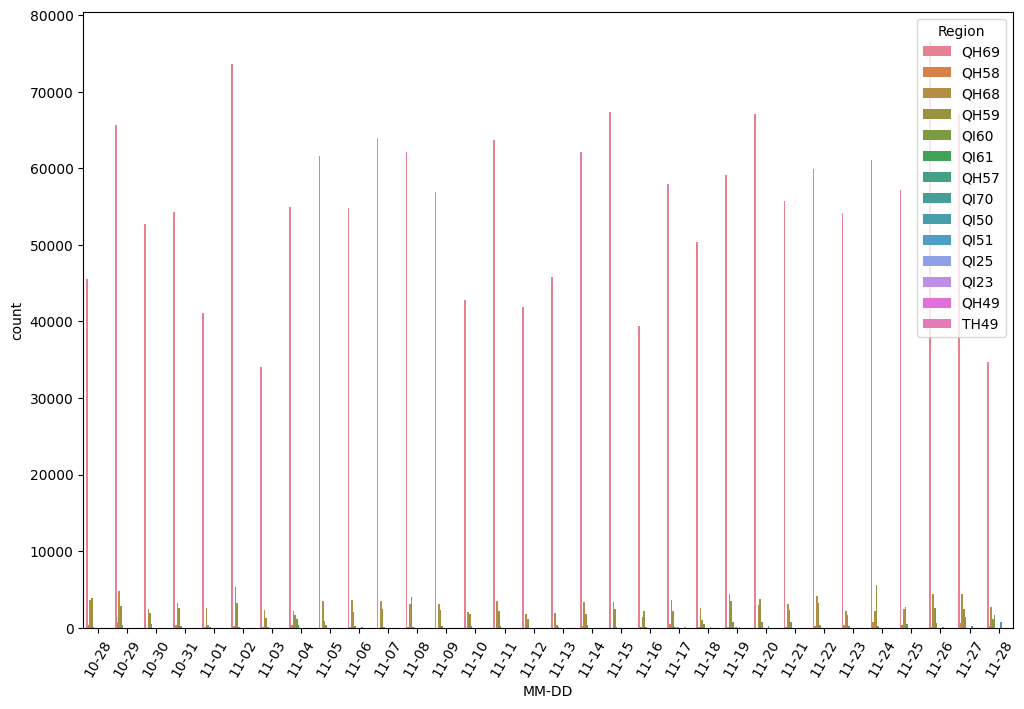

In [8]:
# Set the figure size
plt.figure(figsize=(12, 8))  # You can adjust the width and height as needed
plt.xticks(rotation=60)

# Create the bar plot
sns.countplot(data=ais_cleaned, x='MM-DD', hue='Region', legend=True)

# Display the plot
plt.show()

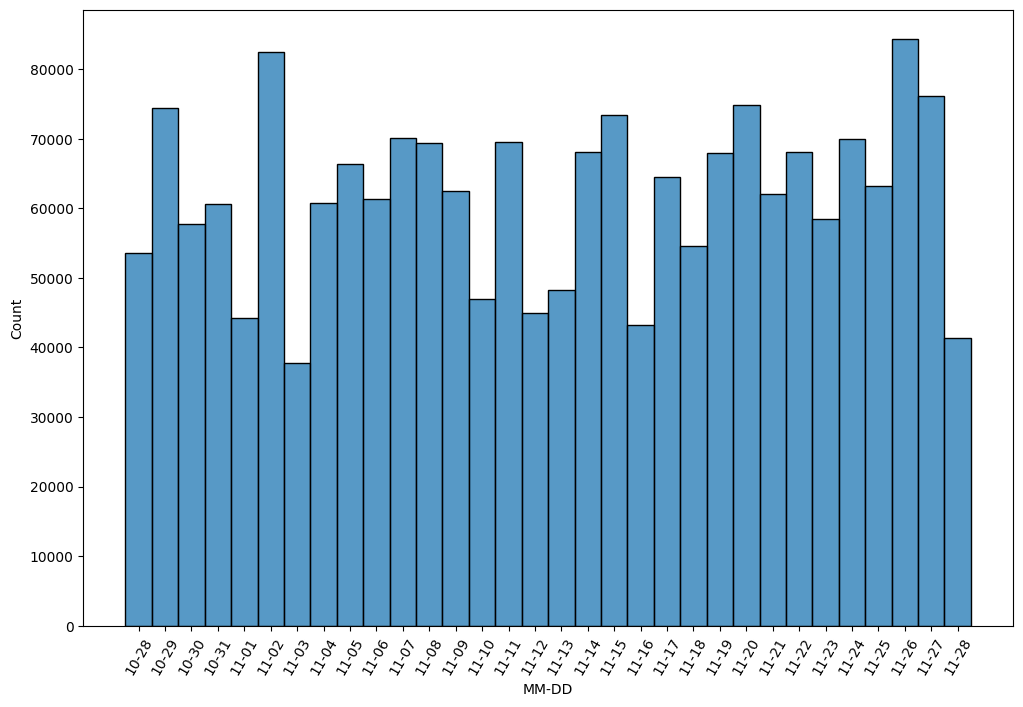

In [9]:
plt.figure(figsize=(12, 8))
plt.xticks(rotation=60)

sns.histplot(data=ais_cleaned, x='MM-DD', kde=False, bins=30)

plt.show()

How does speed over ground (SOG) vary by region and time (SOG, Longitude, Latitude, Timestamp)? 

In [10]:
ais_cleaned.loc[ais_cleaned['SOG'] == '102.2 knots or higher', 'SOG'] = 102.2

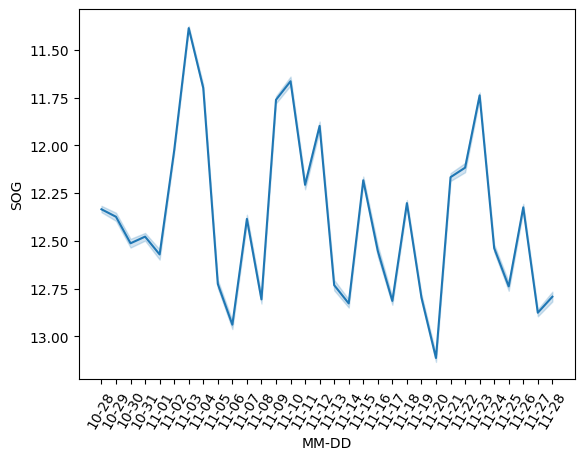

In [11]:
sns.lineplot(data=ais_cleaned, x='MM-DD', y='SOG')
plt.xticks(rotation=60)

plt.show()

Is the vessel near a port or not?

In [12]:
# Approximate conversion factors
meters_per_degree_latitude = 111000  # 111 kilometers per degree
meters_per_degree_longitude = 111000  # Assuming near the equator

# Convert 500 meters to degrees
latitude_threshold = 500 / meters_per_degree_latitude
longitude_threshold = 500 / meters_per_degree_longitude

# Coordinates
long1, lat1 = -0.1276, 51.5074  # Example coordinates
long2, lat2 = -0.1277, 51.5075  # Another point

# Check if long1 and lat1 are within 500 meters of long2 and lat2
if (long1 < long2 + longitude_threshold) and (lat1 < lat2 + latitude_threshold):
    print("The points are within 500 meters of each other.")
else:
    print("The points are more than 500 meters apart.")

The points are within 500 meters of each other.


In [13]:
import math

def haversine_distance(lon1, lat1, lon2, lat2):
    # Convert latitude and longitude from degrees to radians
    lon1, lat1, lon2, lat2 = map(math.radians, [lon1, lat1, lon2, lat2])

    # Haversine formula
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = math.sin(dlat / 2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon / 2)**2
    c = 2 * math.asin(math.sqrt(a))

    # Radius of earth in meters
    r = 6371000

    # Calculate the result
    return c * r

# Create a sample DataFrame
data = {
    'long1': [-0.1276, -0.1277, -0.1278],
    'lat1': [51.5074, 51.5075, 51.5076],
    'long2': [-0.1277, -0.1278, -0.1279],
    'lat2': [51.5075, 51.5076, 51.5077]
}

df = pd.DataFrame(data)

# Apply the haversine_distance function to each row
df['distance'] = df.apply(lambda row: haversine_distance(row['long1'], row['lat1'], row['long2'], row['lat2']), axis=1)

# Check if the distance is within 500 meters
df['At port'] = df['distance'] <= 500

# Print the DataFrame
print(df)


    long1     lat1   long2     lat2   distance  within_500_meters
0 -0.1276  51.5074 -0.1277  51.5075  13.097411               True
1 -0.1277  51.5075 -0.1278  51.5076  13.097403               True
2 -0.1278  51.5076 -0.1279  51.5077  13.097395               True
